In [2]:
# Imports

import os
import pandas as pd
import numpy as np
from PIL import Image

In [7]:
dr_data_without_labels_path = '/sddata/data/retina_datasets/diabetic_retinopathy_detection/data_without_labels'

def find_images(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(root, file))
    return image_paths

directory = "/path/to/directory"
image_paths = find_images(dr_data_without_labels_path)
image_paths[:5]

dataset = ['train' for _ in range(len(image_paths))]
df_dict = {'image':image_paths, 'label':dataset}
df = pd.DataFrame(df_dict)
df.to_csv('/sddata/projects/SSL/custom_mae/csvs/non_labeled_dr_images.csv')

# Combining images

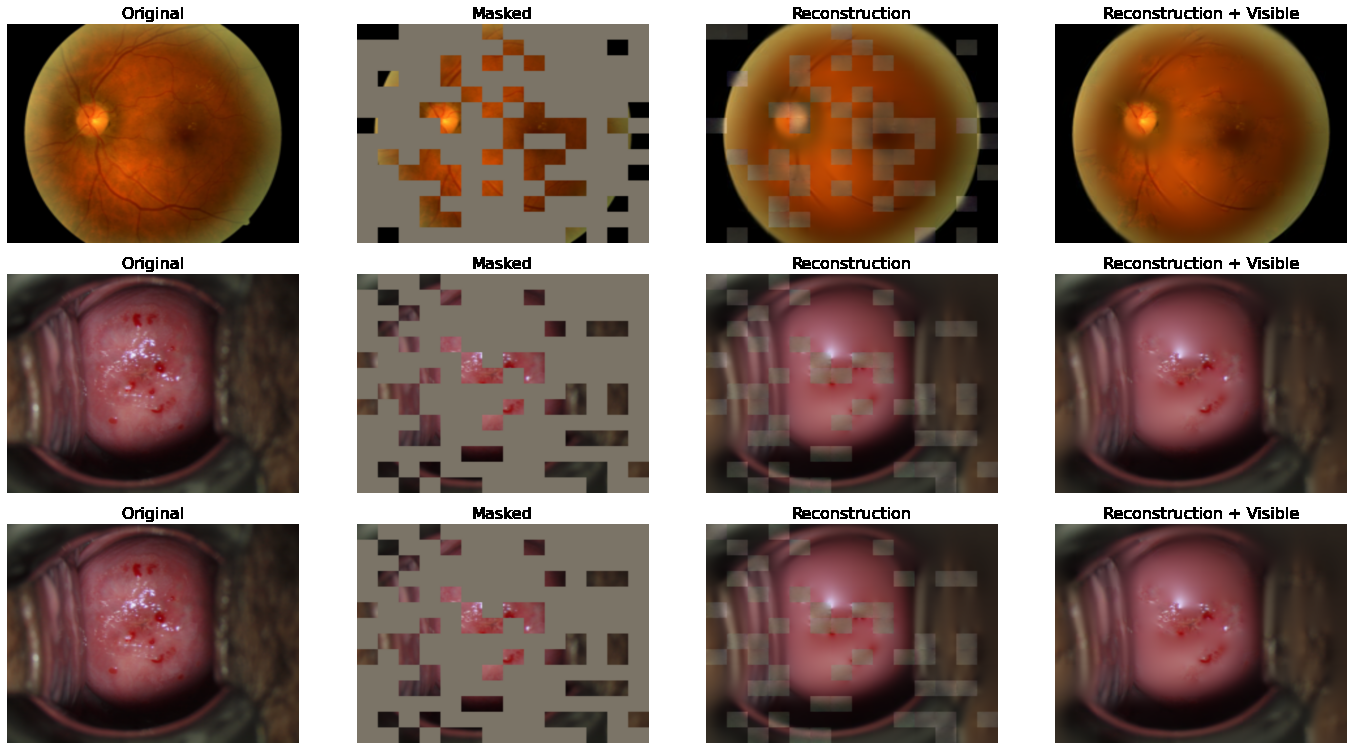

In [3]:
image_paths = ['/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/DR_MAE.png', \
    '/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/Cervix_MAE.png', \
    '/sddata/projects/Diabetic_Retinopathy_Cervix_SSL_vs_SL/presentation/Cervix_MAE.png']

def stack_images(image_paths):
    # Open images
    images = [Image.open(path) for path in image_paths]
    
    # Get dimensions of the first image
    width, height = images[0].size
    
    # Create a new image with double the height to stack images vertically
    stacked_image = Image.new('RGB', (width, height * len(images)))
    
    # Paste each image onto the stacked image
    for i, img in enumerate(images):
        stacked_image.paste(img, (0, i * height))
    
    return stacked_image

stacked_image = stack_images(image_paths)
stacked_image.show()  # Display the stacked image